In [1]:
import pandas as pd
import pysubgroup as ps

In [2]:
from pathlib import Path
import numpy as np
folder_out= Path("L:/experiments")
folder= Path.home()/Path('Downloads')
def show_info(df):
    print(df.columns)
    print(len(df))

In [3]:
df_melb_in = pd.read_csv(folder/'melb_data.csv')
df_melb=df_melb_in.copy()
df_melb = df_melb[df_melb['BuildingArea'] < 1500]
df_melb=df_melb.drop(['Address', "Lattitude", "Longtitude"],axis=1)
#df_housing['price']/=np.max(df_housing['price'])

In [4]:
print(df_melb.columns)
print(len(df_melb))

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')
7125


In [5]:
df_bej_in = pd.read_csv(folder/'bejing.csv',engine="python")

In [6]:
df_bej=df_bej_in.drop(['url','id','Cid','tradeTime','floor'],axis=1)
df_bej['Price']=df_bej['price']*df_bej['square']
df_bej=df_bej.drop(['totalPrice','price'],axis=1)
df_bej=df_bej[~pd.isnull(df_bej.district)]
df_bej.district=df_bej.district.astype('int')
df_bej["bedroom"]=df_bej['livingRoom']
df_bej["livingroom"]=df_bej['drawingRoom']
df_bej=df_bej.drop(['livingRoom','drawingRoom'],axis=1)
#df_melb = df_melb[df_melb['BuildingArea'] < 1500]

In [7]:
df_bej.communityAverage.describe()

count    318388.000000
mean      63682.446305
std       22329.215447
min       10847.000000
25%       46339.000000
50%       59015.000000
75%       75950.000000
max      183109.000000
Name: communityAverage, dtype: float64

In [8]:
show_info(df_bej_in)
show_info(df_bej)

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')
318851
Index(['Lng', 'Lat', 'DOM', 'followers', 'square', 'kitchen', 'bathRoom',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage', 'Price', 'bedroom',
       'livingroom'],
      dtype='object')
318851


In [9]:
print('bej in yuan',df_bej.Price.std())
print('bej in dollar',0.22*df_bej.Price.std())
print('melb',df_melb.Price.std())

bej in yuan 2307820.2307962715
bej in dollar 507720.4507751797
melb 674659.7071068978


In [10]:
#df_nyc = pd.read_csv(folder/'nyc_data.csv')
#df_nyc=df_nyc[df_nyc['SALE PRICE'].str.isnumeric()]
#df_nyc['SALE PRICE']=pd.to_numeric(df_nyc['SALE PRICE'])
#df_nyc=df_nyc[df_nyc['SALE PRICE']<0.5*10**7]
#df_nyc=df_nyc[df_nyc['TOTAL UNITS']<1500]
#show_info(df_nyc)

In [11]:
#ax=df_melb.plot.scatter('BuildingArea', 'Price')
#df_nyc.plot.scatter('TOTAL UNITS', 'SALE PRICE', ax =ax, color='r')

In [12]:
show_info(df_bej)
def room2Numeric(df, column):
    #print(df[column].dtype)
    if df[column].dtype != 'object':
        return df
    df = df[df[column].str.isnumeric()]
    df[column] = pd.to_numeric(df[column])
    return df
df_bej=room2Numeric(df_bej, 'livingroom')
df_bej=room2Numeric(df_bej, 'bedroom')
df_bej=room2Numeric(df_bej, 'bathRoom')
df_bej=room2Numeric(df_bej, 'constructionTime')

Index(['Lng', 'Lat', 'DOM', 'followers', 'square', 'kitchen', 'bathRoom',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage', 'Price', 'bedroom',
       'livingroom'],
      dtype='object')
318851


<ipython-input-12-ee789dacce0b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column])


In [13]:
df_bej.DOM

0         1464.0
1          903.0
2         1271.0
3          965.0
4          927.0
           ...  
318845       1.0
318846       1.0
318847       NaN
318848       1.0
318849       NaN
Name: DOM, Length: 299536, dtype: float64

In [14]:
show_plots=False

In [15]:

#ax=df_nyc["SALE PRICE"].plot.hist(bins=100)
df_melb=df_melb[df_melb["Price"]<5000000]
if show_plots:
    df_melb["Price"].plot.hist(bins=100,color='r')

In [16]:
df_melb=df_melb[df_melb["BuildingArea"]<200]
df_melb=df_melb[df_melb["BuildingArea"]>20]

In [17]:
print(df_bej.Price.max())

181301594.0


In [18]:
df_bej=df_bej[df_bej["Price"]>5000]
df_bej=df_bej[df_bej["square"]<200]
if show_plots:
    df_bej["price"].plot.hist(bins=100,color='b')

In [19]:
df_bej['Price']=df_bej["Price"]/np.std(df_bej["Price"])
df_melb['Price']=df_melb["Price"]/np.std(df_melb["Price"])

In [20]:
#df_bej['square']=df_bej["square"]/np.std(df_bej["square"])
#df_melb['BuildingArea']=df_melb["BuildingArea"]/np.std(df_melb["BuildingArea"])

In [21]:
df_bej=df_bej[df_bej["Price"]<5]
df_melb=df_melb[df_melb["Price"]<5]

In [22]:
len(df_bej)

291646

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,4)})



In [24]:
max_square=max(df_melb['BuildingArea'].max(),df_bej['square'].max())
print(max_square)

199.99


In [25]:
if False:
    
    x=np.linspace(0,max_square)
    ax=plt.scatter(df_bej['square'],df_bej["Price"],color='b',alpha=0.1)
    #ax=plt.scatter(df_melb['BuildingArea'],df_melb["Price"],color='m',alpha=0.5)

    plt.plot(x,np.polyval(np.polyfit(df_bej['square'],df_bej['Price'],1),x),'b--')
    #plt.plot(x,np.polyval(np.polyfit(df_melb['BuildingArea'],df_melb['Price'],1),x),'m--')

In [26]:
#sns.jointplot("square", "totalPrice", data=df_bej_in, kind="hex")
#plt.savefig(Path.home()/Path('matplotlib_images')/'bejing-overview_no_pre.pdf',bbox='tight')

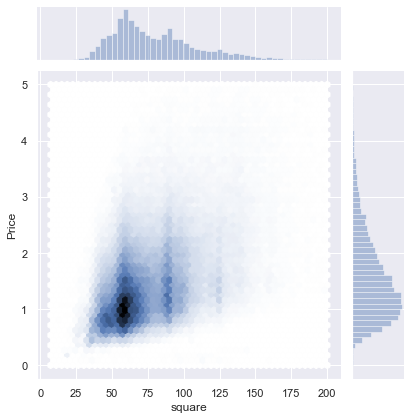

In [27]:
sns.jointplot("square", "Price", data=df_bej, kind="hex")
plt.savefig(folder_out/Path('matplotlib_images')/'bejing-overview.pdf',bbox='tight')

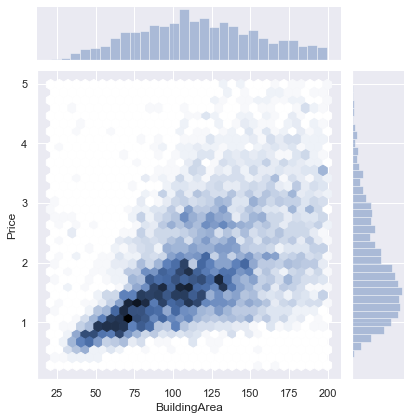

In [28]:
sns.jointplot("BuildingArea", "Price", data=df_melb, kind="hex")
plt.savefig(folder_out/Path('matplotlib_images')/'melb-overview.pdf',bbox='tight')

In [29]:
df_bej.columns

Index(['Lng', 'Lat', 'DOM', 'followers', 'square', 'kitchen', 'bathRoom',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage', 'Price', 'bedroom',
       'livingroom'],
      dtype='object')

In [30]:
if show_plots:
    column='renovationCondition'
    for d in np.unique(df_bej[column]):
        if not pd.isnull(d):
            print(d)
            g = sns.jointplot("square", "Price", data=df_bej[df_bej[column]==d], kind="reg")

In [31]:
if show_plots:
    for d in np.unique(df_bej.district):
        print(d)
        g = sns.jointplot("square", "Price", data=df_bej[df_bej.district==d], kind="reg")


In [32]:
show_info(df_melb)
show_info(df_melb_in)

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')
5734
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
13580


In [33]:
for col in df_melb_in.columns:
    if not col in df_melb:
        print(col)

Address
Lattitude
Longtitude


In [34]:
for val in list(map(lambda x:r"\textbf{'"+x+'\'}',df_melb_in.columns)):
    print(val)

\textbf{'Suburb'}
\textbf{'Address'}
\textbf{'Rooms'}
\textbf{'Type'}
\textbf{'Price'}
\textbf{'Method'}
\textbf{'SellerG'}
\textbf{'Date'}
\textbf{'Distance'}
\textbf{'Postcode'}
\textbf{'Bedroom2'}
\textbf{'Bathroom'}
\textbf{'Car'}
\textbf{'Landsize'}
\textbf{'BuildingArea'}
\textbf{'YearBuilt'}
\textbf{'CouncilArea'}
\textbf{'Lattitude'}
\textbf{'Longtitude'}
\textbf{'Regionname'}
\textbf{'Propertycount'}


In [35]:
show_info(df_bej)

Index(['Lng', 'Lat', 'DOM', 'followers', 'square', 'kitchen', 'bathRoom',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage', 'Price', 'bedroom',
       'livingroom'],
      dtype='object')
291646


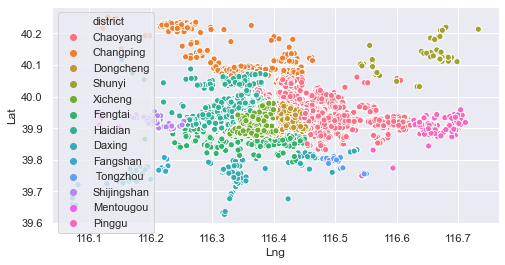

In [36]:
import string
def plot_map(df_in):
    
    d={1:'Dongcheng',
2 : 'Fengtai',
3 : ' Tongzhou',
4 : 'Daxing',
5 : 'Fangshan',
6 : 'Changping',
7 : 'Chaoyang',
8 : 'Haidian',
9 : 'Shijingshan',
10 : 'Xicheng',
11 : 'Pinggu',
12 : 'Mentougou',
13 : 'Shunyi'}
    df=df_in[['Lng','Lat','district']].copy()
    df['district']=df.district.apply(d.get)
    df=df[~df.district.isin(['d','f','m','n'])]
    df.district.value_counts().sort_index()

    sns.scatterplot(x='Lng',y='Lat',hue='district',data=df)
plot_map(df_bej)

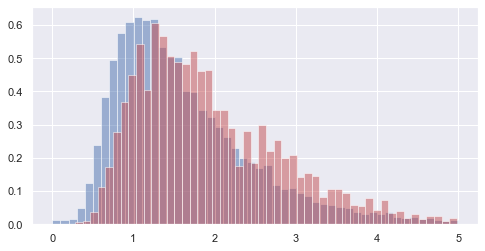

In [37]:
if True:
    plt.hist(df_bej["Price"],bins=50,color='b',density=True,alpha=0.5)
    plt.hist(df_melb["Price"],bins=50,color='r',density=True,alpha=0.5)

In [38]:
df_bej['elevator']=df_bej['elevator'].astype('bool')
df_bej['subway']=df_bej['subway'].astype('bool')
df_bej['fiveYearsProperty']=df_bej['fiveYearsProperty'].astype('bool')
#df_bej=df_bej.drop(['Lng','Lat'],axis=1)

In [39]:
show_info(df_bej)
show_info(df_melb)

Index(['Lng', 'Lat', 'DOM', 'followers', 'square', 'kitchen', 'bathRoom',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage', 'Price', 'bedroom',
       'livingroom'],
      dtype='object')
291646
Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')
5734


In [40]:
depth_bej=2
def create_bej_selectors(df,ignore=['Price','square']):
    nominals=['district','bedroom','livingroom','buildingStructure']
    ignore+=['communityAverage','Lng','Lat']+nominals
    sels=ps.create_nominal_selectors(df,ignore=ignore)+ps.create_numeric_selectors(df,ignore=ignore)
    for column_name in nominals:
        sels+=ps.create_nominal_selectors_for_attribute(df,column_name)
    return sels

def create_melb_selectors(df,ignore=['BuildingArea','Price']):
    ignore+=['Date','SellerG','Suburb']
    sels=ps.create_nominal_selectors(df,ignore=ignore)+ps.create_numeric_selectors(df,ignore=ignore)
    return sels

def run_single_task(df_bej, df_melb, Qf_L, Qf_R, sim_fun, total_fun, parameters):
    sels_L=create_bej_selectors(df_bej)
    sels_R=create_melb_selectors(df_melb)

    task_L = ps.SubgroupDiscoveryTask(df_bej, None, sels_L, Qf_L, result_set_size = parameters.result_size, depth=depth_bej)
    task_L.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#parameters.result_size)
    task_R = ps.SubgroupDiscoveryTask(df_melb, None, sels_R, Qf_R, result_set_size = parameters.result_size, depth=parameters.depth)
    task_R.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#(parameters.result_size)
    similarity_function = sim_fun
    run=beam_search_through_candidates(task_L, task_R, parameters.total_result_size, None, similarity_function, total_fun, show_progress=True)

    tpl_L=next(run)
    tpl_R=next(run)
    result=next(run)
    return result

In [50]:
from RDMM.evaluation_framework import *
result=[]
alpha=0.5
beta=1
gamma=0.5

ex_qf1 = SizeWrapper(EMM_LikelihoodGain(PolyRegression_ModelClass('square','Price')), gamma)
ex_qf2 = SizeWrapper(EMM_LikelihoodGain(PolyRegression_ModelClass('BuildingArea','Price')), gamma)
sim_qf = DoubleCooksSimilarity(PolyRegression_ModelClass('square','Price'), PolyRegression_ModelClass('BuildingArea','Price'))
#sim_qf = LikelihoodSimilarity(PolyRegression_ModelClass('square','price'), PolyRegression_ModelClass('BuildingArea','Price'))
parameters=mine_pair_parameters(500,100,2,'mine_pair',[])

result=list(sorted(run_single_task(df_bej, df_melb, ex_qf1, ex_qf2, sim_qf, functools.partial(final_qf,alpha,beta), parameters),reverse=True))

  0%|▍                                                                                                                                                                                                                                                   | 6/3081 [00:00<00:53, 57.85it/s]e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
 16%|██████████████████████████████████████▏                                                                                                                                                                                                         | 725/4560 [00:00<00:01, 3579.70it/s]e:\sgd\rdmm-project\RDMM\QualityFunctions.py:181: RankWarning: Polyfit ma

bedroom==1 AND district==6 <=> Type=='t' AND YearBuilt>=2000.0


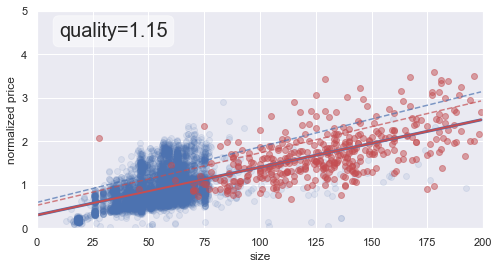

buildingStructure==2 AND renovationCondition==1 <=> CouncilArea=='Brimbank'


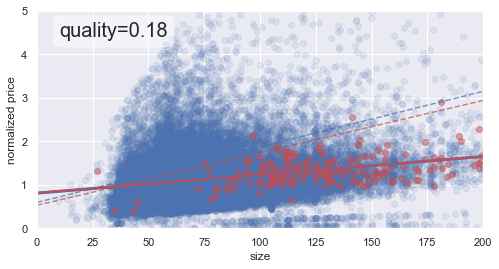

buildingStructure==2 AND renovationCondition==1 <=> CouncilArea=='Brimbank' AND Regionname=='Western Metropolitan'


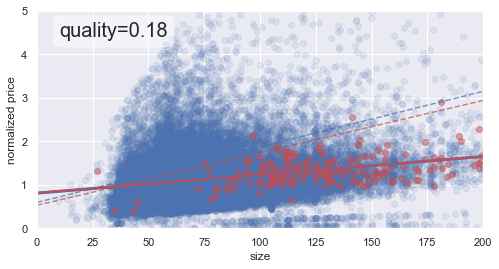

e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)


DOM: [15.0:48.0[ AND bedroom==2 <=> Method=='S' AND YearBuilt<1930.0


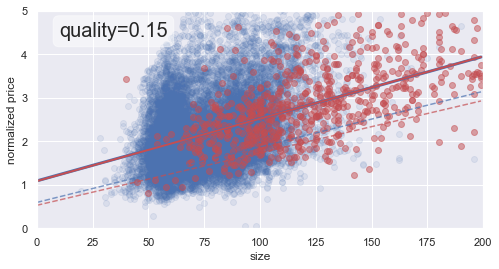

e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)


district==11 AND elevator==False <=> CouncilArea=='Maribyrnong' AND YearBuilt>=2000.0


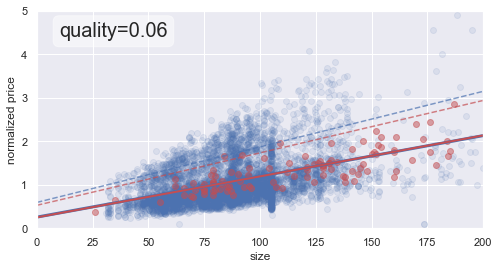

buildingStructure==2 AND kitchen==1 <=> Bathroom==2.0 AND Distance>=13.80


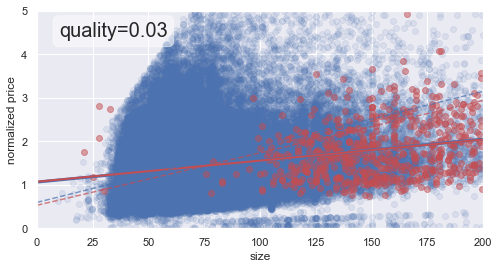

buildingStructure==2 AND followers: [3:9[ <=> Distance>=13.80 AND Type=='h'


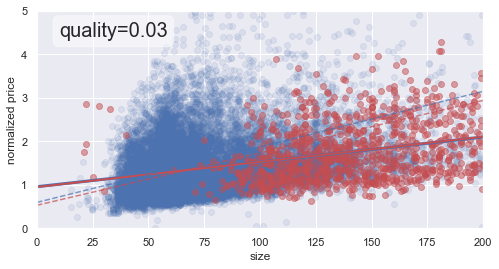

buildingStructure==2 <=> Bathroom==2.0 AND Distance>=13.80


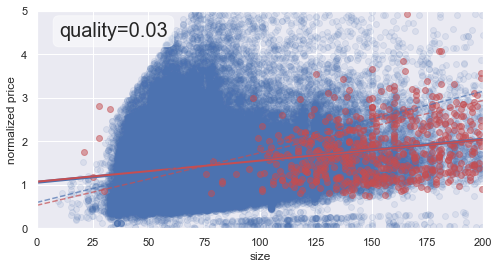

e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)


district==6 AND livingroom==2 <=> Car>=4.0 AND YearBuilt: [1970.0:2000.0[


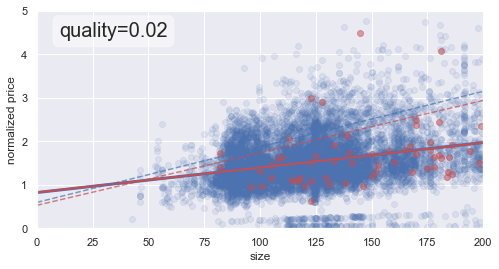

e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)


constructionTime: [1992:1998[ AND district==6 <=> Method=='SP' AND YearBuilt>=2000.0


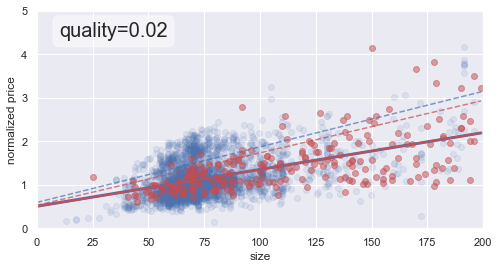

In [51]:
def plot_result(score,tpl,df1,df2):
    overall1=np.polyfit(df1['square'],df1['Price'],1)
    overall2=np.polyfit(df2['BuildingArea'],df2['Price'],1)

    sgd1,sgd2,stats_1,stats_2,_,_,_=tpl
    df1_cov=df1[sgd1.covers(df1)]
    df2_cov=df2[sgd2.covers(df2)]
    max_square=max(df2_cov['BuildingArea'].max(),df1_cov['square'].max())
    x=np.linspace(0,max_square)

    
    plt.scatter(df1_cov['square'],df1_cov['Price'],alpha=1/10,color='b',label='bejing subgroup')
    beta1=np.polyfit(df1_cov['square'],df1_cov['Price'],1)
   

    plt.scatter(df2_cov['BuildingArea'],df2_cov['Price'],color='r',alpha=0.5,label='melbourne subgroup')
     
    beta2=np.polyfit(df2_cov['BuildingArea'],df2_cov['Price'],1)
    plt.plot(x,np.polyval(beta1,x),color='b',linewidth=3,label='bejing subgroup fit')
    plt.plot(x,np.polyval(beta2,x),color='r',linewidth=2,label='melbourne subgroup fit')
    
    plt.plot(x,np.polyval(overall1,x),'b--',alpha=0.7,label='bejing overall fit')
    plt.plot(x,np.polyval(overall2,x),'r--',alpha=0.7,label='melbourne overall fit')

    plt.ylabel('normalized price')
    plt.xlabel('size')
    plt.xlim([0,200])
    plt.ylim([0,5])
    #plt.legend(loc='upper left')
    np.set_printoptions(precision=6)
    textstr=f'quality={np.round(score,2)}'#'\nbeta1={str(beta1)}\nbeta2={str(beta1)}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr,transform=plt.gca().transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
    
    print(str(sgd1)+' <=> '+str(sgd2))
    return str(sgd1)+' <=> '+str(sgd2)
subgroup_descriptions=[]
for i in range(10):
    fig=plt.figure()
    desc=plot_result(result[0+i][0],result[0+i][1],df_bej, df_melb)
    subgroup_descriptions.append(' '.join([str(i),str(result[0+i][0]),desc]))
    fig.savefig(folder_out/Path('matplotlib_images')/f'top-{int(alpha*10)}-{int(beta*10)}-{int(gamma*10)}-{depth_bej}-{parameters.depth}-{i}.png',bbox='tight',bbox_inches = 'tight', pad_inches = 0)
    plt.show()

        

In [53]:
with open(folder_out/Path('matplotlib_images')/f'top-{int(alpha*10)}-{int(beta*10)}-{int(gamma*10)}-{depth_bej}-{parameters.depth}.txt','w')as f:
    f.write('\r\n'.join(subgroup_descriptions))

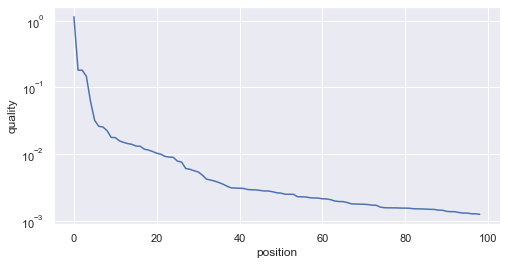

In [64]:
qualities = []
for tpl in result:
    qualities.append(tpl[0])
    
plt.plot(qualities[:99])
plt.yscale('log')
plt.xlabel("position")
plt.ylabel("quality")
plt.savefig(folder_out/Path('matplotlib_images')/'quality_distibution.png',bbox='tight',bbox_inches = 'tight', pad_inches = 0)

In [73]:
L_mat=np.zeros((10,10))
R_mat=np.zeros((10,10))
covs_L=[]
covs_R=[]
for i in range(10):
    sgd1,sgd2,stats_1,stats_2,_,_,_=result[0+i][1]
    covs_L.append(sgd1.covers(df_bej))
    covs_R.append(sgd2.covers(df_melb))
    
for i in range(10):
    for j in range(10):
        if i<j:
            L_mat[i,j]=np.sum(np.logical_and(covs_L[i],covs_L[j]))/np.sum(np.logical_or(covs_L[i],covs_L[j]))
            L_mat[j,i]=L_mat[i,j]
            R_mat[i,j]=np.sum(np.logical_and(covs_R[i],covs_R[j]))/np.sum(np.logical_or(covs_R[i],covs_R[j]))
            R_mat[j,i]=R_mat[i,j]

In [74]:
np.set_printoptions(precision=2)
print(L_mat)

[[0.   0.02 0.02 0.   0.   0.02 0.02 0.02 0.   0.04]
 [0.02 0.   1.   0.01 0.05 0.37 0.1  0.37 0.06 0.03]
 [0.02 1.   0.   0.01 0.05 0.37 0.1  0.37 0.06 0.03]
 [0.   0.01 0.01 0.   0.01 0.06 0.02 0.06 0.02 0.02]
 [0.   0.05 0.05 0.01 0.   0.04 0.04 0.04 0.   0.  ]
 [0.02 0.37 0.37 0.06 0.04 0.   0.2  0.99 0.07 0.03]
 [0.02 0.1  0.1  0.02 0.04 0.2  0.   0.2  0.05 0.02]
 [0.02 0.37 0.37 0.06 0.04 0.99 0.2  0.   0.07 0.03]
 [0.   0.06 0.06 0.02 0.   0.07 0.05 0.07 0.   0.03]
 [0.04 0.03 0.03 0.02 0.   0.03 0.02 0.03 0.03 0.  ]]


In [75]:
print(R_mat)

[[0.   0.02 0.02 0.   0.1  0.05 0.   0.05 0.   0.1 ]
 [0.02 0.   1.   0.01 0.   0.04 0.05 0.04 0.05 0.02]
 [0.02 1.   0.   0.01 0.   0.04 0.05 0.04 0.05 0.02]
 [0.   0.01 0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.07]
 [0.05 0.04 0.04 0.   0.   0.   0.48 1.   0.03 0.04]
 [0.   0.05 0.05 0.   0.   0.48 0.   0.48 0.04 0.02]
 [0.05 0.04 0.04 0.   0.   1.   0.48 0.   0.03 0.04]
 [0.   0.05 0.05 0.   0.   0.03 0.04 0.03 0.   0.  ]
 [0.1  0.02 0.02 0.   0.07 0.04 0.02 0.04 0.   0.  ]]


In [76]:
print(str(L_mat))

[[0.   0.02 0.02 0.   0.   0.02 0.02 0.02 0.   0.04]
 [0.02 0.   1.   0.01 0.05 0.37 0.1  0.37 0.06 0.03]
 [0.02 1.   0.   0.01 0.05 0.37 0.1  0.37 0.06 0.03]
 [0.   0.01 0.01 0.   0.01 0.06 0.02 0.06 0.02 0.02]
 [0.   0.05 0.05 0.01 0.   0.04 0.04 0.04 0.   0.  ]
 [0.02 0.37 0.37 0.06 0.04 0.   0.2  0.99 0.07 0.03]
 [0.02 0.1  0.1  0.02 0.04 0.2  0.   0.2  0.05 0.02]
 [0.02 0.37 0.37 0.06 0.04 0.99 0.2  0.   0.07 0.03]
 [0.   0.06 0.06 0.02 0.   0.07 0.05 0.07 0.   0.03]
 [0.04 0.03 0.03 0.02 0.   0.03 0.02 0.03 0.03 0.  ]]


In [ ]:
with open(Path.home()/Path('matplotlib_images')/f'top-{int(alpha*10)}-{int(beta*10)}-{int(gamma*10)}-{depth_bej}-{parameters.depth}_L_mat.txt','w')as f:
    f.write(str(L_mat))
with open(Path.home()/Path('matplotlib_images')/f'top-{int(alpha*10)}-{int(beta*10)}-{int(gamma*10)}-{depth_bej}-{parameters.depth}_R_mat.txt','w')as f:
    f.write(str(R_mat))

In [ ]:
L_mat[5,7]

In [ ]:
R_mat[5,7]

In [68]:
t=0.1
arr=np.array(np.logical_and(L_mat>t, R_mat>t),dtype=int)
print(arr)
print(arr.sum())

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
4


In [69]:
plt.plot(range(1,100),[entry[0] for entry in result[0:99]])
plt.yscale('log')
plt.ylabel('score')
plt.xlabel('place')

Text(0.5, 0, 'place')

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

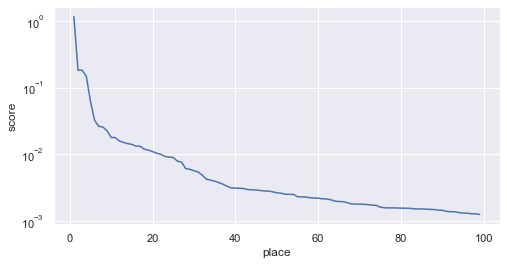

In [70]:
np.arange(1,101)

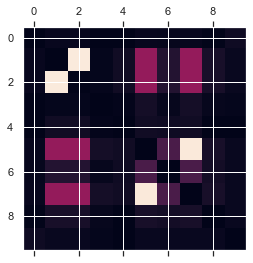

In [77]:
plt.matshow(L_mat)

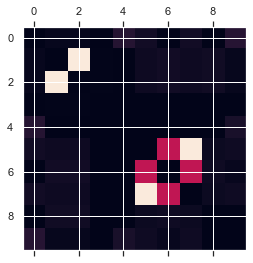

In [78]:
plt.matshow(R_mat)